In [9]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter


import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from wordcloud import WordCloud

import json

In [ ]:
df = pd.read_csv('../movies_all.csv', encoding='latin1')

# Analyze data

In [83]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew', 'keywords', 'Imdb Link',
       'Title', 'IMDB Score', 'Genre', 'Poster'],
      dtype='object')

In [84]:
df = df[['budget', 'Genre', 'original_language', 'original_title', 'popularity',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'vote_average', 'vote_count']]

In [85]:
df.columns

Index(['budget', 'Genre', 'original_language', 'original_title', 'popularity',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'vote_average', 'vote_count'],
      dtype='object')

In [86]:
df

,budget,Genre,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,vote_average,vote_count
0,30000000,Animation|Adventure|Comedy,en,Toy Story,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,7.7,5415.0
1,65000000,Action|Adventure|Family,en,Jumanji,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,6.9,2413.0
2,0,Comedy|Romance,en,Grumpier Old Men,11.712900,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,6.5,92.0
3,16000000,Comedy|Drama|Romance,en,Waiting to Exhale,3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,6.1,34.0
4,0,Comedy|Family|Romance,en,Father of the Bride Part II,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...
39012,0,Action|Comedy,en,Ã¥Â°ÂÃ¥Â­ÂÃ¥ÂÂ½Ã¥Â¤Â§,0.009192,"[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}, {'...",1979-01-01,0.0,90.0,6.0,1.0
39013,0,Crime|Drama|Thriller,en,Snatched,0.053082,"[{'iso_3166_1': 'US', 'name': 'United States o...",1973-01-31,0.0,73.0,0.0,0.0
39014,125000000,Action|Drama|History,en,Band of Brothers,7.903731,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2001-09-09,0.0,705.0,8.2,725.0
39015,0,Documentary,en,Cosmos,0.282584,[],NaN,0.0,60.0,9.1,41.0


In [87]:
df.dropna(axis=0, subset=['production_countries'], inplace=True)

In [88]:
df

,budget,Genre,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,vote_average,vote_count
0,30000000,Animation|Adventure|Comedy,en,Toy Story,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,7.7,5415.0
1,65000000,Action|Adventure|Family,en,Jumanji,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,6.9,2413.0
2,0,Comedy|Romance,en,Grumpier Old Men,11.712900,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,6.5,92.0
3,16000000,Comedy|Drama|Romance,en,Waiting to Exhale,3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,6.1,34.0
4,0,Comedy|Family|Romance,en,Father of the Bride Part II,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...
39012,0,Action|Comedy,en,Ã¥Â°ÂÃ¥Â­ÂÃ¥ÂÂ½Ã¥Â¤Â§,0.009192,"[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}, {'...",1979-01-01,0.0,90.0,6.0,1.0
39013,0,Crime|Drama|Thriller,en,Snatched,0.053082,"[{'iso_3166_1': 'US', 'name': 'United States o...",1973-01-31,0.0,73.0,0.0,0.0
39014,125000000,Action|Drama|History,en,Band of Brothers,7.903731,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2001-09-09,0.0,705.0,8.2,725.0
39015,0,Documentary,en,Cosmos,0.282584,[],NaN,0.0,60.0,9.1,41.0


In [89]:
df["production_countries"] = df["production_countries"].apply(eval)

In [90]:
def get_countries(keywords):
    return '|'.join([x['name'] for x in keywords])

df["production_countries"]=df["production_countries"].apply(get_countries)

In [91]:
df.production_countries

0                       United States of America
1                       United States of America
2                       United States of America
3                       United States of America
4                       United States of America
                          ...                   
39012                           Hong Kong|Taiwan
39013                   United States of America
39014    United Kingdom|United States of America
39015                                           
39016                   United States of America
Name: production_countries, Length: 39014, dtype: object

In [92]:
df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,3.901400e+04,39014.000000,3.901400e+04,38844.000000,39014.000000,39014.000000
mean,4.667700e+06,3.074587,1.239176e+07,95.733756,5.685011,121.453401
std,1.814296e+07,5.549564,6.681953e+07,37.449369,1.845842,516.454239
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.438309,0.000000e+00,86.000000,5.100000,4.000000
50%,0.000000e+00,1.264442,0.000000e+00,95.000000,6.000000,11.000000
75%,0.000000e+00,4.268833,0.000000e+00,108.000000,6.800000,41.000000
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


In [93]:
df.dtypes

budget                    int64
Genre                    object
original_language        object
original_title           object
popularity              float64
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
vote_average            float64
vote_count              float64
dtype: object

In [98]:
avg_rating= sum(df.vote_average)/len(df.original_title)

In [103]:
df["vote_level"] = [ "high_level" if each>avg_rating else "down_level"  for each in df.vote_average] #We have defined a new column according to the average vote.

df.loc[:4,["original_title","vote_level","vote_average"]]

,original_title,vote_level,vote_average
0,Toy Story,high_level,7.7
1,Jumanji,high_level,6.9
2,Grumpier Old Men,high_level,6.5
3,Waiting to Exhale,high_level,6.1
4,Father of the Bride Part II,high_level,5.7


In [104]:
df.original_language.unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu'],
      dtype=object)

In [106]:
df.original_language.value_counts(dropna = False)

en    28044
fr     2074
it     1322
ja     1170
de      902
      ...  
iu        1
sm        1
gl        1
mt        1
ne        1
Name: original_language, Length: 88, dtype: int64

In [109]:
df[df.budget != 0]

,budget,Genre,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,vote_average,vote_count,vote_level
0,30000000,Animation|Adventure|Comedy,en,Toy Story,21.946943,United States of America,1995-10-30,373554033.0,81.0,7.7,5415.0,high_level
1,65000000,Action|Adventure|Family,en,Jumanji,17.015539,United States of America,1995-12-15,262797249.0,104.0,6.9,2413.0,high_level
3,16000000,Comedy|Drama|Romance,en,Waiting to Exhale,3.859495,United States of America,1995-12-22,81452156.0,127.0,6.1,34.0,high_level
5,60000000,Action|Crime|Drama,en,Heat,17.924927,United States of America,1995-12-15,187436818.0,170.0,7.7,1886.0,high_level
6,58000000,Comedy|Drama,en,Sabrina,6.677277,Germany|United States of America,1995-12-15,0.0,127.0,6.2,141.0,high_level
...,...,...,...,...,...,...,...,...,...,...,...,...
38987,125000000,Animation|Adventure|Comedy,en,Trolls,16.837110,United States of America,2016-10-13,346864462.0,92.0,6.7,1054.0,high_level
38990,40000,Comedy|Fantasy|Horror,en,Nightmare Sisters,1.453912,United States of America,1988-06-15,0.0,83.0,4.9,8.0,down_level
39000,1446950,Horror,en,The Forgotten,0.808207,United Kingdom,2014-08-22,0.0,89.0,6.2,6.0,high_level
39001,1,Thriller,en,Hidden in the Woods,0.805883,United States of America|Chile,2014-12-12,0.0,98.0,5.1,9.0,down_level


In [111]:
avg_cost = round(sum(df.budget)/8235)
df.budget.replace([0],avg_cost,inplace=True)

In [113]:
df.revenue

0        373554033.0
1        262797249.0
2                0.0
3         81452156.0
4         76578911.0
            ...     
39012            0.0
39013            0.0
39014            0.0
39015            0.0
39016            0.0
Name: revenue, Length: 39014, dtype: float64

In [114]:
df[df.revenue != 0]

,budget,Genre,original_language,original_title,popularity,production_countries,release_date,revenue,runtime,vote_average,vote_count,vote_level
0,30000000,Animation|Adventure|Comedy,en,Toy Story,21.946943,United States of America,1995-10-30,373554033.0,81.0,7.7,5415.0,high_level
1,65000000,Action|Adventure|Family,en,Jumanji,17.015539,United States of America,1995-12-15,262797249.0,104.0,6.9,2413.0,high_level
3,16000000,Comedy|Drama|Romance,en,Waiting to Exhale,3.859495,United States of America,1995-12-22,81452156.0,127.0,6.1,34.0,high_level
4,22113620,Comedy|Family|Romance,en,Father of the Bride Part II,8.387519,United States of America,1995-02-10,76578911.0,106.0,5.7,173.0,high_level
5,60000000,Action|Crime|Drama,en,Heat,17.924927,United States of America,1995-12-15,187436818.0,170.0,7.7,1886.0,high_level
...,...,...,...,...,...,...,...,...,...,...,...,...
38891,22113620,Drama|Family,en,Moondance Alexander,0.896046,United States of America,2007-04-22,37895.0,94.0,6.0,13.0,high_level
38973,75000000,Action|Adventure|Crime,en,Inferno,18.311054,Hungary|United States of America,2016-10-13,220021259.0,121.0,5.7,2316.0,high_level
38974,9000000,Horror|Thriller,en,Ouija: Origin of Evil,10.182974,United States of America,2016-10-20,81705746.0,99.0,5.8,735.0,high_level
38987,125000000,Animation|Adventure|Comedy,en,Trolls,16.837110,United States of America,2016-10-13,346864462.0,92.0,6.7,1054.0,high_level


In [115]:
avg_rev = round(sum(df.budget)/8235)
df.revenue.replace([0],avg_rev,inplace=True)

In [117]:
df.to_csv('movies_for_vis.csv', index=False)

# Visualization

In [3]:
df = pd.read_csv('movies_for_vis.csv', encoding='latin1')

In [4]:
df = df.dropna()

## Bar graphs

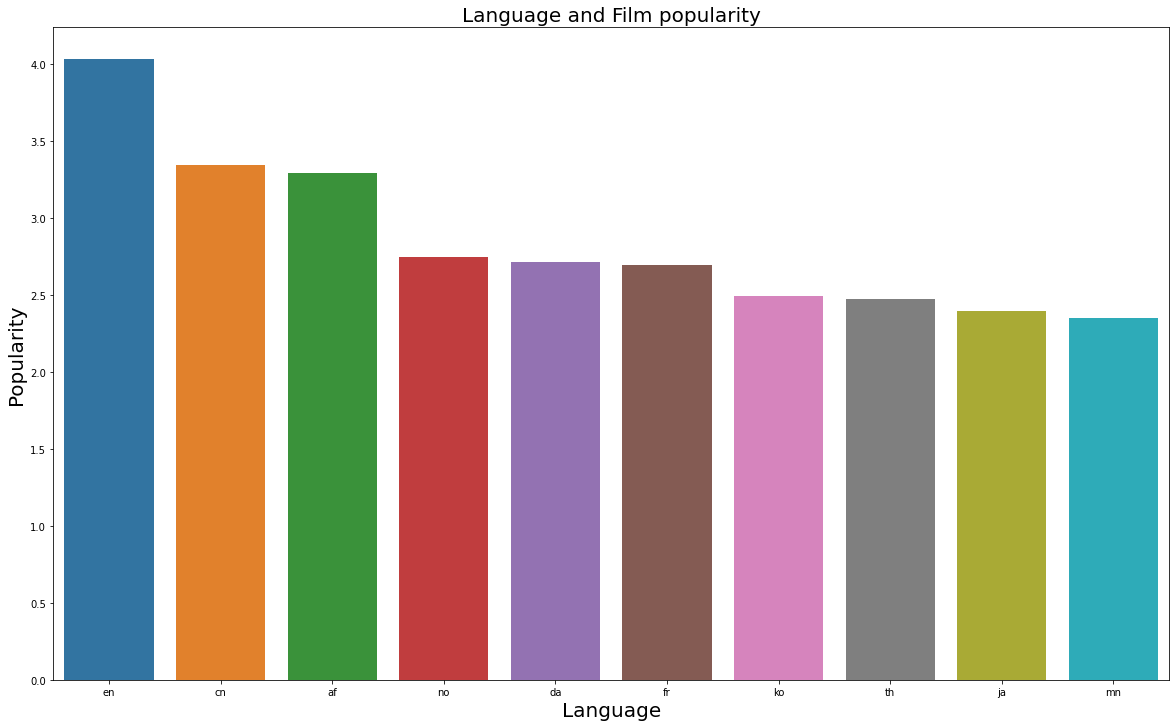

In [6]:
unique = list(df.original_language.unique())
list_ratio=[]
for each in unique:
    x = df[df["original_language"] == each]
    ratio_popularity = sum(x.popularity)/len(x)
    list_ratio.append(ratio_popularity)
    
df2 = pd.DataFrame({"language":unique,"ratio":list_ratio})
new_index = (df2.ratio.sort_values(ascending = False)).index.values
sorted_data= df2.reindex(new_index).iloc[:10]

#Visualization
plt.figure(figsize = (20,12))
fig = sns.barplot(x=sorted_data["language"], y=sorted_data["ratio"])

# plt.xticks(rotation= 90)
plt.xlabel("Language",fontsize=20)
plt.ylabel("Popularity",fontsize= 20)
plt.title("Language and Film popularity",fontsize= 20)
fig.figure.savefig('plots/language_film_pop.png')
plt.show()

In [7]:
sorted_data

,language,ratio
0,en,4.035623
7,cn,3.345906
47,af,3.291494
23,no,2.746138
22,da,2.716463
1,fr,2.696633
13,ko,2.492071
33,th,2.470935
12,ja,2.396024
43,mn,2.351724


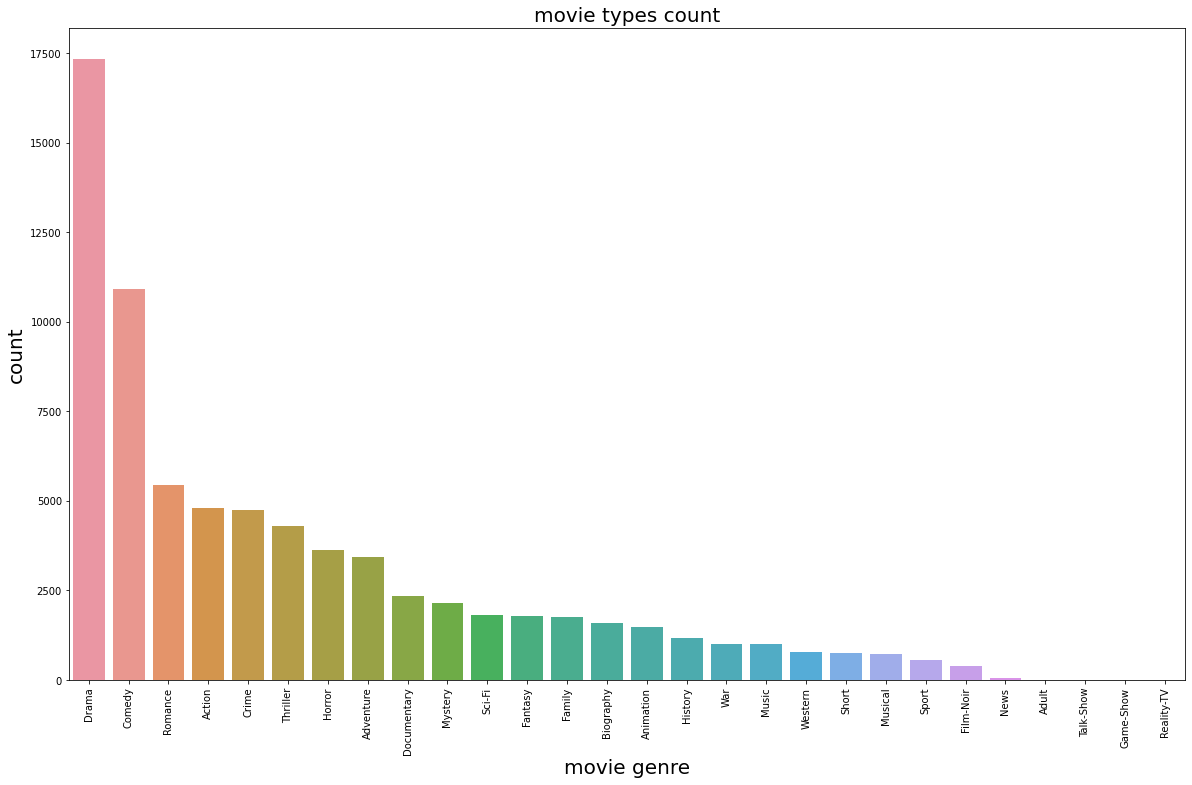

In [39]:
genre = df.Genre.copy()

list_kind = genre.str.split("|")
a = []
for each in list_kind:
    for i in each:
        a.append(i)
        
c=[]
for each in a:
    if each != "":
         c.append(each)        
        
f = dict(Counter(c))

df3 = pd.DataFrame(list(f.items()),columns = ["kind","ratio"])
new_index =( df3.ratio.sort_values(ascending=False)).index.values
new = df3.reindex(new_index)



plt.figure( figsize = (20, 12))
fig = sns.barplot(x="kind",y="ratio",data=new)
plt.xticks(rotation = 90)
plt.xlabel("movie genre",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.title("movie types count",fontsize = 20)
fig.figure.savefig('plots/genre_count.png')
plt.show()

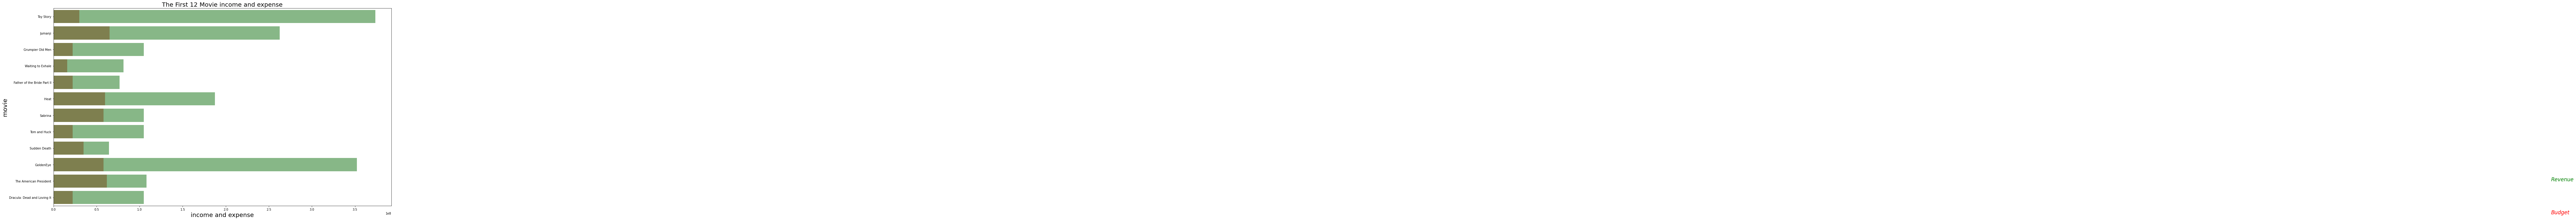

In [48]:
plt.figure(figsize = (20,12))
   
sns.barplot(x = "budget", y = "original_title",data= df.head(12),color= "red", alpha=0.5,label ="Budget")
fig = sns.barplot(x = "revenue",y = "original_title", data=  df.head(12),color="green",alpha=0.5,Label="Revenue")

plt.text(2900000000,10,s="Revenue",color="green",fontsize = 17 ,style ="italic")
plt.text(2900000000,12, s="Budget", color="red",  fontsize = 17 ,style ="italic")

plt.xlabel("income and expense",fontsize= 20)
plt.ylabel("movie",fontsize= 20)
plt.title("The First 12 Movie income and expense",fontsize = 20)
fig.figure.savefig('plots/income_expance.png')

In [17]:
trace1 = go.Bar(
    x = sorted_data.language,
    y = sorted_data.ratio,
    name = "Ratio",
    marker = dict(
        color = list(range(1, 35)),
        colorscale = "Bluered")
)

data1= [trace1]
layout = dict(barmode = "group", 
              title='plotly langugare popularity plot',
             xaxis =  dict(title_text='language',showgrid = False, showline = False, zeroline = False),
          yaxis = dict(title_text='popularity', showgrid = False, showline = False, zeroline = False))

fig = go.Figure(data=data1, layout=layout)
fig.show()
plot(fig, filename = 'plots/plotply_language_pop.html', auto_open=False)

'plots/plotply_language_pop.html'

## Line Graphs

In [23]:
df.head(10)['runtime']

0     81.0
1    104.0
2    101.0
3    127.0
4    106.0
5    170.0
6    127.0
7     97.0
8    106.0
9    130.0
Name: runtime, dtype: float64

In [45]:
f, ax = plt.subplots(figsize = (50,30))
                    
sns.pointplot(x ="original_title", y = "runtime", data= df.head(10),color = "red")
fig = sns.pointplot(x ="original_title", y = "popularity", data= df.head(10), color = "green")

plt.xticks(rotation = 70,fontsize = 25)
plt.yticks(fontsize=25)

ax.text(45, 400, "Runtime", color ="red", fontsize= 35, style ="italic")
ax.text(45, 385, "Popularity", color = "green", fontsize = 35, style ="italic")

ax.set_xlabel("Original Title", fontsize = 30, color="blue")
ax.set_ylabel("Runtime and Popularity", fontsize=30, color="blue")
ax.set_title("Runtime vs Popularity", fontsize = 40, color="blue")
plt.grid()
# fig.legend(loc='upper left', labels=['runtime', 'popularity'])
fig.figure.savefig('plots/runtime_pop_line_graph.png')


In [51]:
df1 = df.head(100).copy()

trace1 =go.Scatter(
    x =df1.index,
    y = df1.popularity,
    mode ="lines",
    name = " Popularity",
    marker = dict(color = "rgb(242, 99, 74,0.7)"),
    text = df1.original_title
)
trace2 = go.Scatter(
    x = df1.index,
    y = df1.runtime,
    mode = "lines + markers",
    name = "Runtime",
    marker = dict( color = "rgb(144, 211, 74,0.5)"),
    text = df1.original_title
)
trace3 = go.Scatter(
    x = df1.index,
    y = df1.vote_average,
    mode = "markers",
    name = "Vote Averge",
    marker = dict(color = "rgb(118, 144, 165)"),
    text = df1.original_title
)
data1=[trace1,trace2,trace3]
layout = dict(
    title = "Runtime vs Popularity"
)
fig = go.Figure(data=data1, layout=layout)

plot(fig, filename = 'plots/plotly_runtime_vs_pop.html', auto_open=False)

'plots/plotly_runtime_vs_pop.html'

## Scatter plots

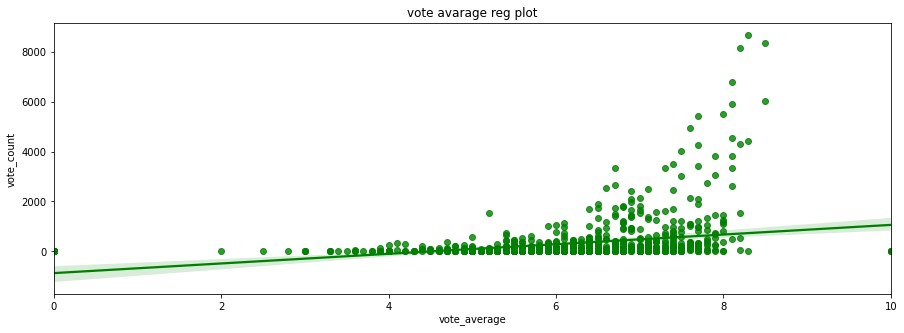

In [60]:
plt.figure(figsize = (15,5))
fig = sns.regplot(df.vote_average.head(1000), df.vote_count.head(1000), color = "g")
plt.title('vote avarage reg plot')
fig.figure.savefig('plots/sns_reg_vote_avg.png')
plt.show()

In [63]:
df1 = df.head(200).copy()

trace1 = go.Scatter(
    x = df1.index,
    y = df1.vote_average,
    mode = "markers",
    name = "Vote Average",
    marker = dict(color = "rgb(120, 171, 200,0)"),
    text = df1.original_title
)
trace2 = go.Scatter(
    x = df1.index,
    y = df1.vote_count,
    mode ="markers",
    name = "Vote Count",
    marker =dict (
        color = "rgb(168, 229, 183)",
        size = 10,
        line = dict(
            color = "rgb(251, 203, 251)",
            width = 2
        )
    ),
    text = df1.original_title
)
data1 = [trace1,trace2]
layout = dict( title = " Vote Average and Vote Count")
fig = go.Figure(data = data1 , layout = layout)
plot(fig, filename='plots/plotly_vote_avg_vote_vount.html', auto_open=False)

'plots/plotly_vote_avg_vote_vount.html'